# Problem Statement: House Price Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [ ]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [ ]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


# Visualizations

### Univariate Analysis

<ipython-input-10-946c9a37f137>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


<Axes: xlabel='price', ylabel='Density'>

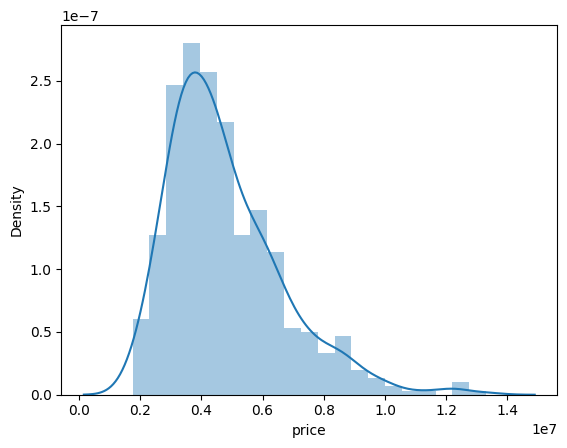

In [ ]:
sns.distplot(data.price)

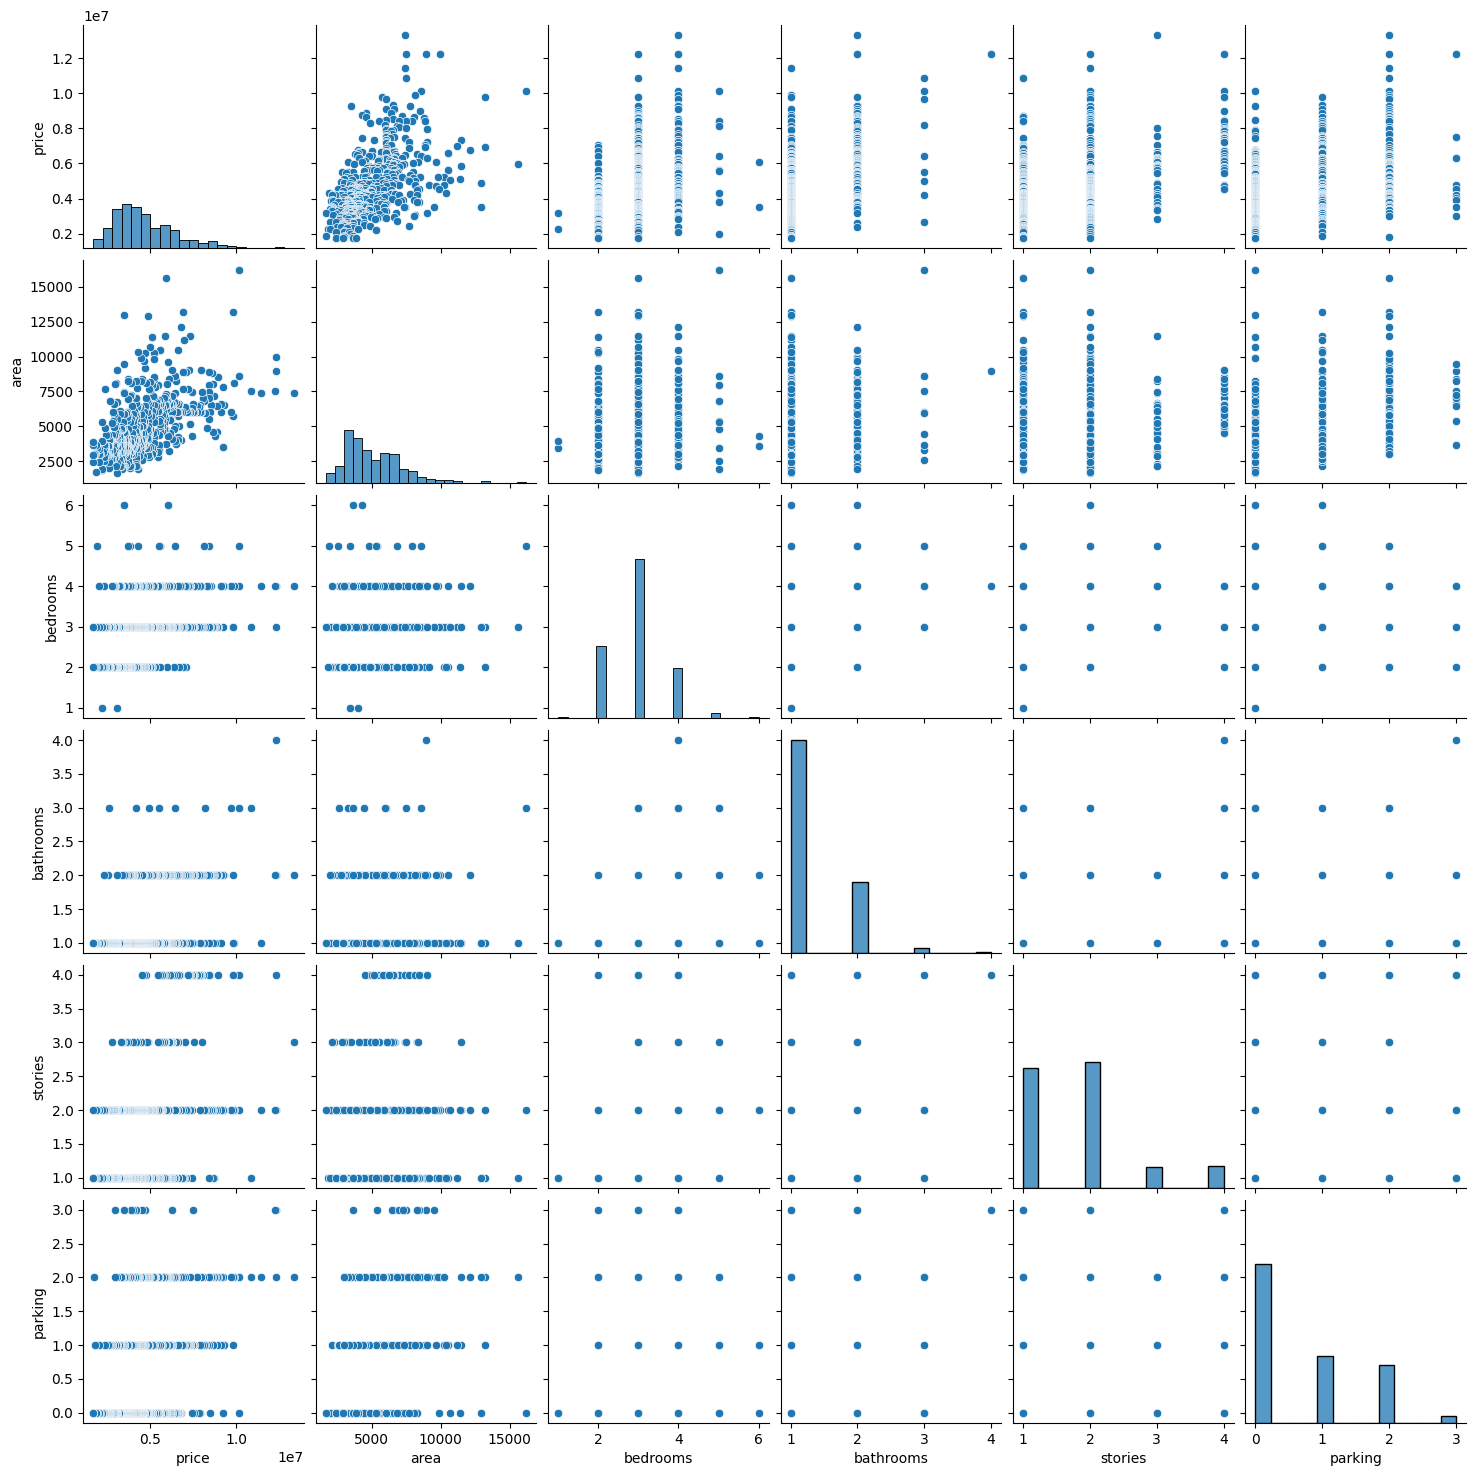

In [ ]:
sns.pairplot(data)

## Bivariate Analysis

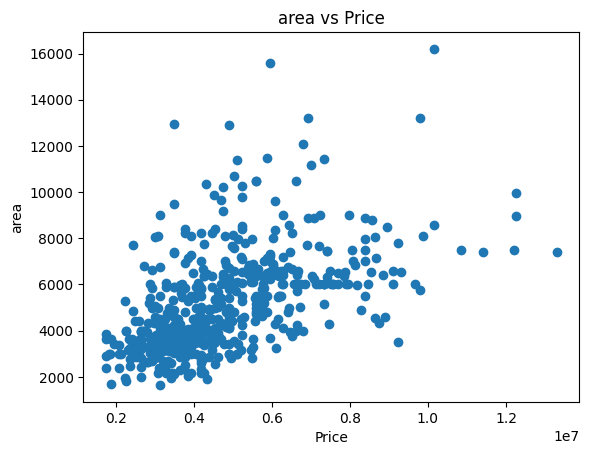

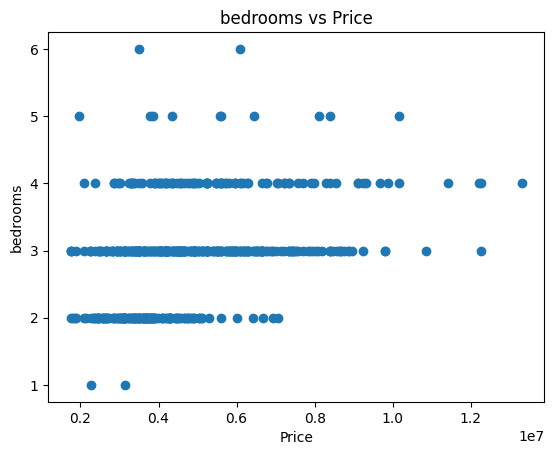

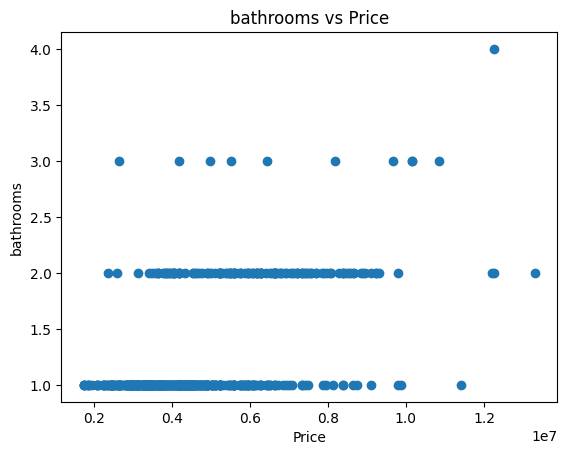

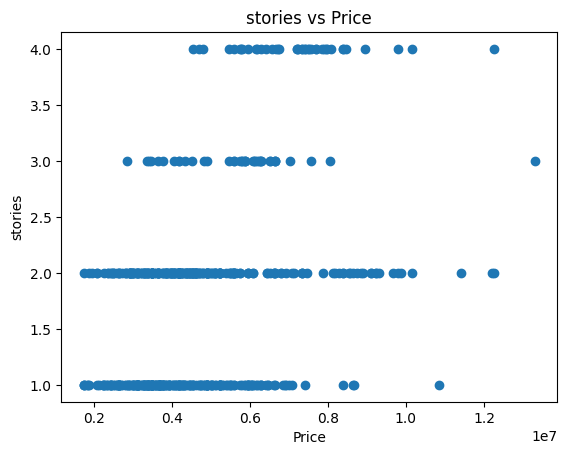

In [ ]:
def scatter_plot(x):

    plt.scatter(data['price'], data[x])
    plt.title(x +' vs Price') #title of the graph
    plt.xlabel('Price') #x-axis
    plt.ylabel(x) #y-axis
    plt.show()


scatter_plot('area')
scatter_plot('bedrooms')
scatter_plot('bathrooms')
scatter_plot('stories')

## MultiVariate Analysis

<ipython-input-14-e9975bf2d0a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

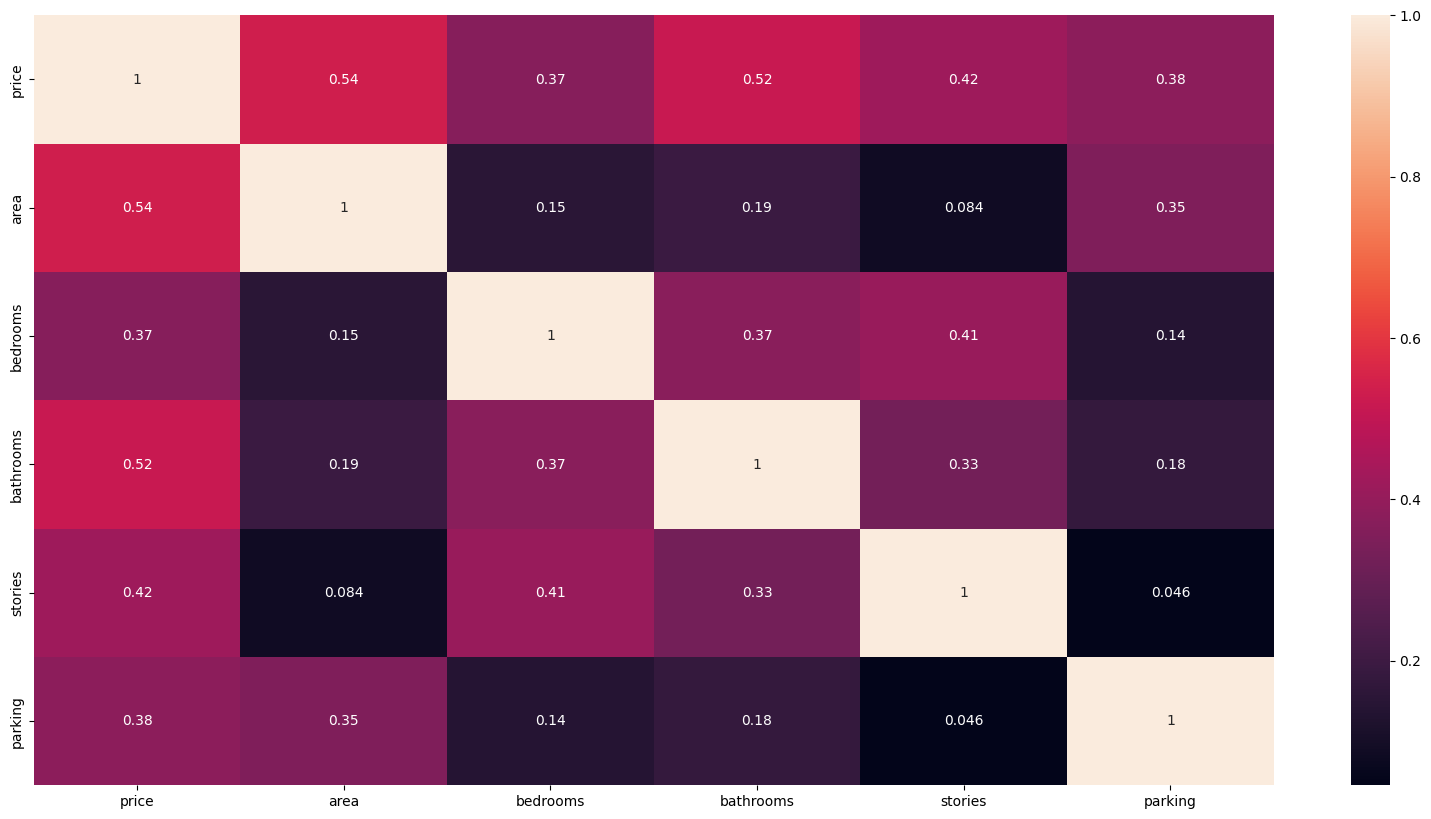

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True)

# Performing descriptive statistics on the dataset

In [ ]:
#summary of all the data
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


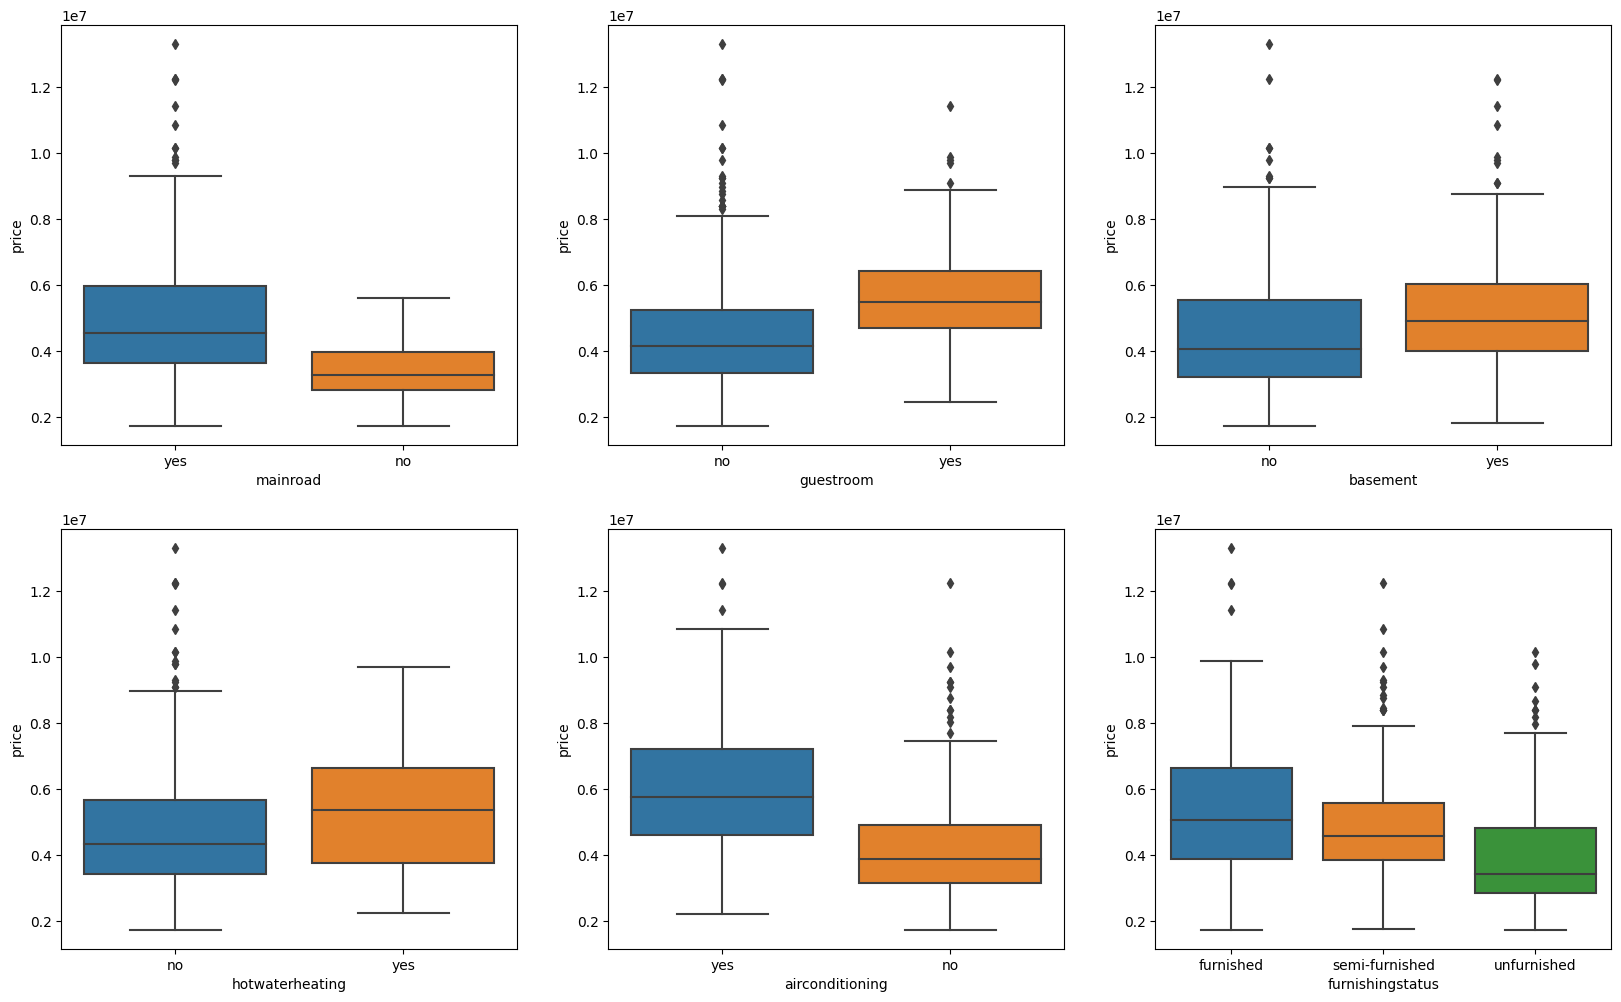

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
plt.show()

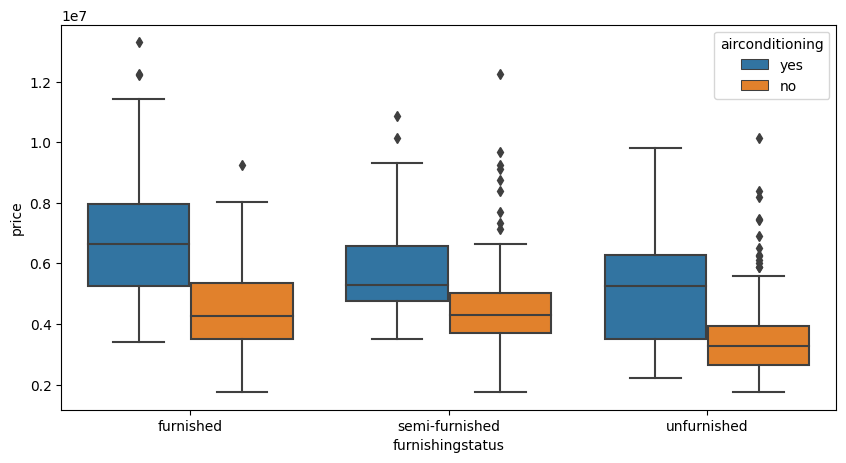

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

# Missing values handling

In [ ]:
data.isna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [ ]:
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

# Finding the outliers & replacing them

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [ ]:
data.shape

(545, 12)

In [ ]:
min_threshold=data['price'].quantile(0.25)
min_threshold

3430000.0

In [ ]:
max_threshold=data['price'].quantile(0.75)
max_threshold

5740000.0

In [ ]:
data[data.price<min_threshold]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
414,3423000,4040,2,1,1,yes,no,no,no,no,0,unfurnished
415,3395000,4785,3,1,2,yes,yes,yes,no,yes,1,furnished
416,3395000,3450,3,1,1,yes,no,yes,no,no,2,unfurnished
417,3395000,3640,2,1,1,yes,no,no,no,no,0,furnished
418,3360000,3500,4,1,2,yes,no,no,no,yes,2,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [ ]:
data[data.price>max_threshold]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
131,5810000,5828,4,1,4,yes,yes,no,no,no,0,semi-furnished
132,5810000,5200,3,1,3,yes,no,no,no,yes,0,semi-furnished
133,5810000,4800,3,1,3,yes,no,no,no,yes,0,unfurnished
134,5803000,7000,3,1,1,yes,no,yes,no,no,2,semi-furnished


In [ ]:
data1= data[(data.price<max_threshold) & (data.price>min_threshold)]
data1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
141,5652500,6660,4,2,2,yes,yes,yes,no,no,1,semi-furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,semi-furnished
143,5600000,4800,5,2,3,no,no,yes,yes,no,0,unfurnished
144,5600000,4700,4,1,2,yes,yes,yes,no,yes,1,furnished
145,5600000,5000,3,1,4,yes,no,no,no,no,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
403,3500000,12944,3,1,1,yes,no,no,no,no,0,unfurnished
404,3493000,4900,3,1,2,no,no,no,no,no,0,unfurnished
405,3465000,3060,3,1,1,yes,no,no,no,no,0,unfurnished
406,3465000,5320,2,1,1,yes,no,no,no,no,1,unfurnished


In [ ]:
data1.shape

(267, 12)

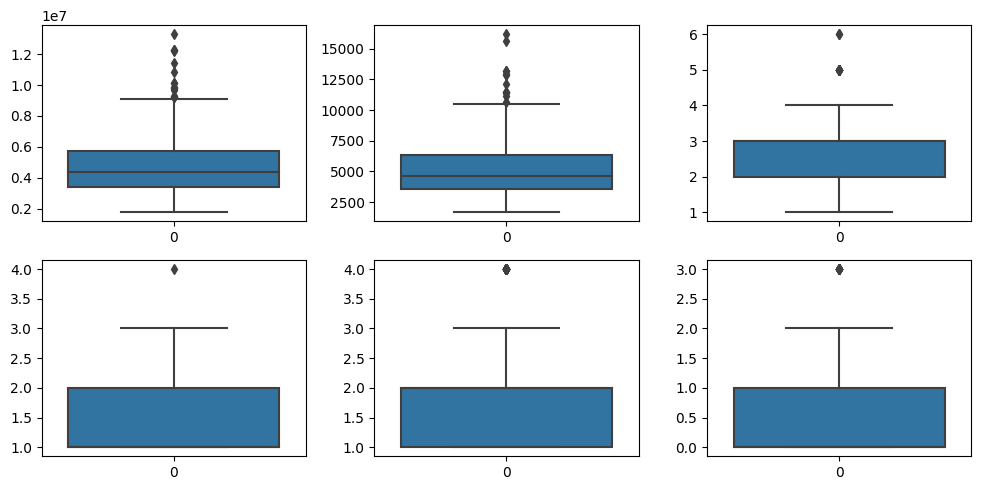

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

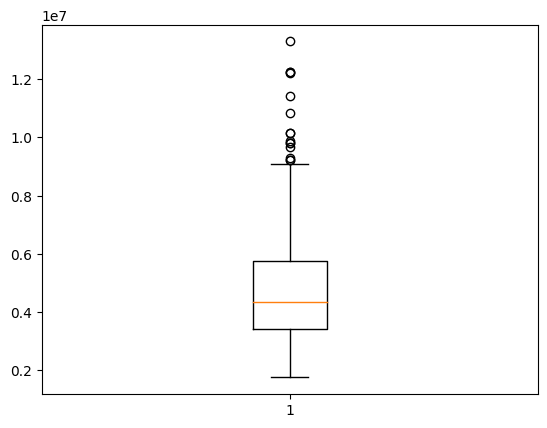

In [ ]:
# outlier treatment for price
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
housing = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

# Checking Categorical columns & perform encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [ ]:
#enconding furnishingstatus
le = LabelEncoder()
data.furnishingstatus=le.fit_transform(data.furnishingstatus)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,2
541,1767150,2400,3,1,1,no,no,no,no,no,0,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,2
543,1750000,2910,3,1,1,no,no,no,no,no,0,0


In [ ]:
#encoding airconditioning
data.airconditioning=le.fit_transform(data.airconditioning)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,1,2,0
1,12250000,8960,4,4,4,yes,no,no,no,1,3,0
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,1
3,12215000,7500,4,2,2,yes,no,yes,no,1,3,0
4,11410000,7420,4,1,2,yes,yes,yes,no,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,0,2,2
541,1767150,2400,3,1,1,no,no,no,no,0,0,1
542,1750000,3620,2,1,1,yes,no,no,no,0,0,2
543,1750000,2910,3,1,1,no,no,no,no,0,0,0


In [ ]:
#encoding hotwaterheating
data.hotwaterheating=le.fit_transform(data.hotwaterheating)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,0,1,2,0
1,12250000,8960,4,4,4,1,no,no,0,1,3,0
2,12250000,9960,3,2,2,1,no,yes,0,0,2,1
3,12215000,7500,4,2,2,1,no,yes,0,1,3,0
4,11410000,7420,4,1,2,1,yes,yes,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,0,0,2,2
541,1767150,2400,3,1,1,0,no,no,0,0,0,1
542,1750000,3620,2,1,1,1,no,no,0,0,0,2
543,1750000,2910,3,1,1,0,no,no,0,0,0,0


In [ ]:
#encoding mainroad
data.mainroad=le.fit_transform(data.mainroad)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,0,1,2,0
1,12250000,8960,4,4,4,1,no,no,0,1,3,0
2,12250000,9960,3,2,2,1,no,yes,0,0,2,1
3,12215000,7500,4,2,2,1,no,yes,0,1,3,0
4,11410000,7420,4,1,2,1,yes,yes,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,0,0,2,2
541,1767150,2400,3,1,1,0,no,no,0,0,0,1
542,1750000,3620,2,1,1,1,no,no,0,0,0,2
543,1750000,2910,3,1,1,0,no,no,0,0,0,0


# Splitting the data into dependent & independent variables

In [ ]:
X=data.iloc[:,0:13]
X.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,0,1,2,0
1,12250000,8960,4,4,4,1,no,no,0,1,3,0
2,12250000,9960,3,2,2,1,no,yes,0,0,2,1
3,12215000,7500,4,2,2,1,no,yes,0,1,3,0
4,11410000,7420,4,1,2,1,yes,yes,0,1,2,0


In [ ]:
Y=data.iloc[:,13:]
Y.head()

""
0
1
2
3
4






# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_new = data.copy(deep=True)
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

data_new[num_columns] = MinMaxScaler().fit_transform(data_new[num_columns])

data_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,no,no,0,1,0.666667,0
1,12250000,0.502405,0.6,1.000000,1.000000,1,no,no,0,1,1.000000,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,no,yes,0,0,0.666667,1
3,12215000,0.402062,0.6,0.333333,0.333333,1,no,yes,0,1,1.000000,0
4,11410000,0.396564,0.6,0.000000,0.333333,1,yes,yes,0,1,0.666667,0


# Splitting the data into training and testing

In [ ]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories','parking']]
y = housing['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Training the model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

359699.8464506939


In [ ]:
lm.coef_

array([3.03441990e+02, 7.49840613e+04, 1.00949996e+06, 5.67787129e+05,
       2.55279765e+05])

In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
area,3.034420e+02
bedrooms,7.498406e+04
bathrooms,1.009500e+06
stories,5.677871e+05
parking,2.552798e+05


# Predicting

In [ ]:
predictions = lm.predict(X_test)
predictions

array([5750084.74804067, 4150223.26054582, 5591610.60146291,
       4952994.17744775, 6309730.48130765, 4200543.46915576,
       4762115.8903328 , 5815157.92361774, 6812520.20785965,
       4529663.08440105, 3363569.40509666, 3174491.15537615,
       3640052.22321347, 4203676.21573533, 4443297.06145758,
       4016320.29128129, 4372650.23640193, 3509610.05397628,
       3854619.60012567, 4505288.27591227, 5816927.41376732,
       3044955.31520052, 4223437.8317349 , 6117015.30094768,
       4210911.65862128, 4754034.93477155, 4853820.18472256,
       4031880.88429868, 4341360.79090315, 3521709.84696634,
       6127665.28708129, 5942603.55957619, 4923915.28449971,
       3934390.95387943, 5122471.63592693, 7964616.92273434,
       3940459.79368697, 5644491.30863444, 4432462.19822172,
       5434095.60009014, 5257824.41204791, 5100034.57705172,
       3482788.21759946, 3058845.86732694, 3797842.05820965,
       3385160.95129656, 6950732.18137572, 3280695.8520082 ,
       5789198.50208163,

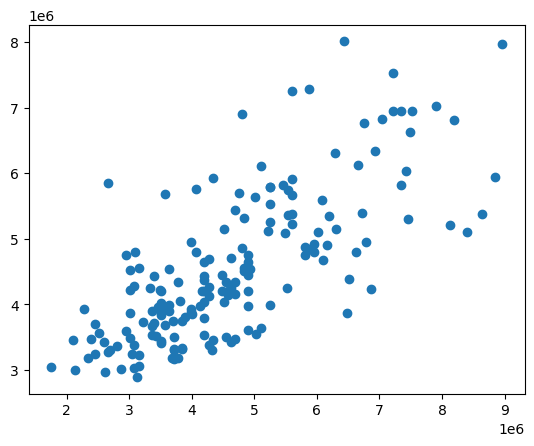

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-73-5eafd2b47918>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,bins=30)


<Axes: xlabel='price', ylabel='Density'>

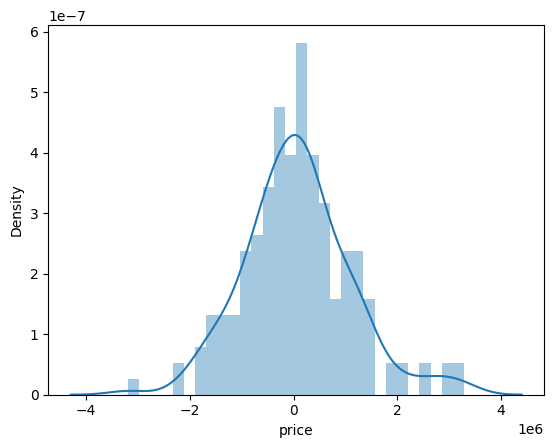

In [ ]:
sns.distplot(y_test-predictions,bins=30)


# Performance Metrics

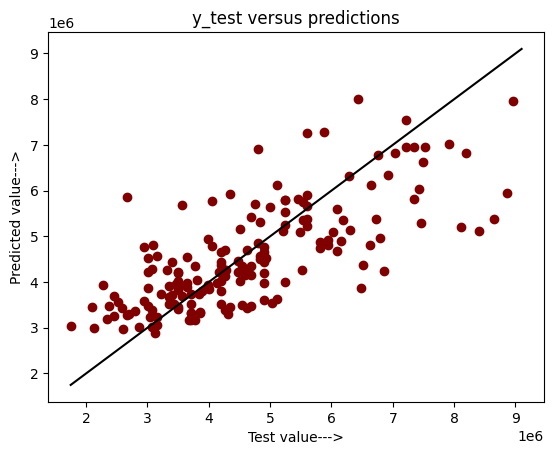

In [ ]:
plt.scatter(y_test,predictions, c='maroon')
x=y
plt.plot(x,y,c='k')
plt.title('y_test versus predictions')
plt.xlabel('Test value--->')
plt.ylabel('Predicted value--->')
plt.show()

In [ ]:
from sklearn import metrics
%matplotlib inline

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

772258.228450245

In [ ]:
metrics.mean_squared_error(y_test,predictions)

1070115405977.8622

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1034463.8253597185